THE FIRST THING TO DO IS TO UNDERSTAND THE DATA

In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

import seaborn as sns
import sys

sys.path.append("..")
from src.utils import read_csv_file

In [5]:
# os.chdir('./Users/ermel/deep_learning_for_energy_recovery/notebooks')

DATASET_PATH = pathlib.Path("../data/raw")

## LABELS

In [10]:
labels_path = DATASET_PATH / "LABELS.csv"

header, lines = read_csv_file(labels_path)

print("Header:", header)
print("Number of lines:", len(lines))

Reading CSV file: 101it [00:00, 165349.22it/s]

Header: ['Supply_ID', 'CLUSTER']
Number of lines: 100


In [27]:
import os

print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir("."))
print("Files in parent directory:", os.listdir(".."))

Current working directory: /Users/ermel/deep_learning_for_energy_recovery/notebooks
Files in current directory: ['.gitkeep', 'explore_datasets.ipynb']
Files in parent directory: ['LICENSE', 'uv.lock', 'references', 'pyproject.toml', '.dist', 'models', '__pycache__', 'README.md', '.gitignore', 'utils.py', '.env', '.venv', 'data', 'notebooks', 'reports', 'src']


Text(0, 0.5, 'Number of Samples')

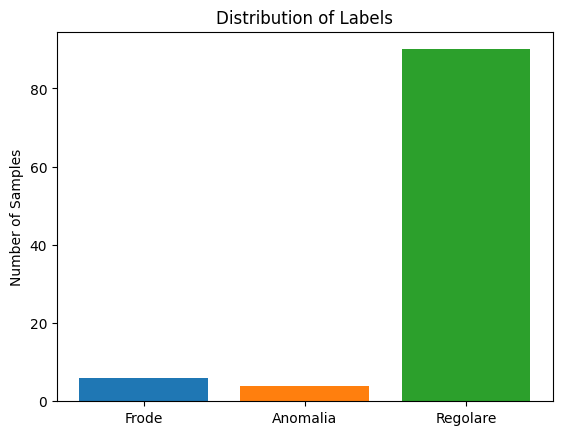

In [28]:
Frode_mask = lines[:, 1] == "Frode"
Anomalia_mask = lines[:, 1] == "Anomalia"
Regolare_mask = lines[:, 1] == "Regolare"


fig, ax = plt.subplots()

classes = ["Frode", "Anomalia", "Regolare"]
counts = [np.sum(Frode_mask), np.sum(Anomalia_mask), np.sum(Regolare_mask)]


ax.bar(classes, counts, color=sns.color_palette())
ax.set_title("Distribution of Labels")
ax.set_ylabel("Number of Samples")

we can notice that the class distribution is not balanced, so we will have to take care of that when training the model

## ANAGRAFICA

In [14]:
anagrafica_path = os.path.join(DATASET_PATH, "ANAGRAFICA.csv")


header, lines = read_csv_file(anagrafica_path)

pandas_df = pd.DataFrame(lines, columns=header)
pandas_df.head()

Reading CSV file: 1935it [00:00, 500893.55it/s]


,Supply_ID,begin_date_ref,end_date_ref,available_power,supply_status
0,SUPPLY001,06/11/2005 23:00:00,31/12/2006 22:59:59,,C
1,SUPPLY001,31/12/2006 23:00:00,05/02/2007 12:08:37,,C
2,SUPPLY001,05/02/2007 12:08:38,29/06/2008 21:59:59,,C
3,SUPPLY001,29/06/2008 22:00:00,31/12/2008 22:59:59,,C
4,SUPPLY001,31/12/2008 23:00:00,29/07/2013 21:59:59,,C


<Axes: xlabel='Supply_ID'>

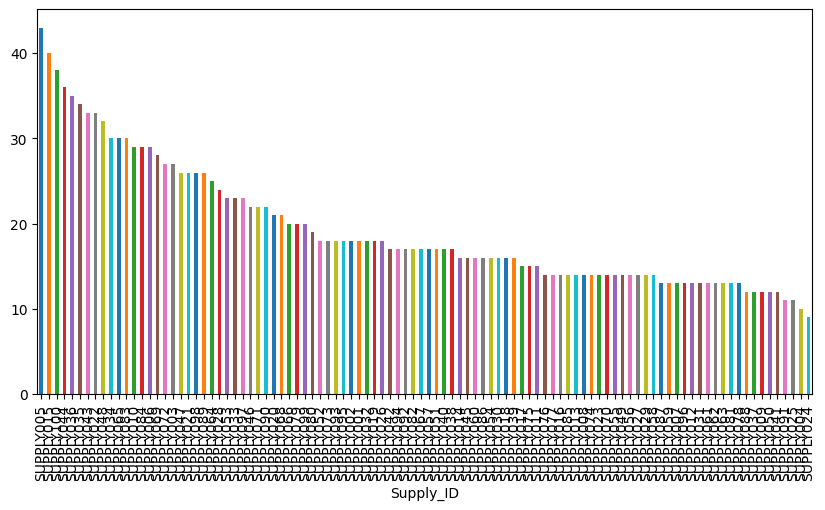

In [19]:
pandas_df["Supply_ID"].value_counts().plot(
    kind="bar", figsize=(10, 5), color=sns.color_palette()
)

## CONSUMI

In [73]:
consumi_path = os.path.join(DATASET_PATH, "CONSUMI.csv")

header, lines = read_csv_file(consumi_path)

pandas_df = pd.DataFrame(lines, columns=header)
pandas_df.head()

,Supply_ID,meas_ym,meas_dd,id,val,magnitude
0,SUPPLY001,202210,20,1,0,A1
1,SUPPLY001,202210,20,2,0,A1
2,SUPPLY001,202210,20,3,0,A1
3,SUPPLY001,202210,20,4,0,A1
4,SUPPLY001,202210,20,5,0,A1


<Axes: xlabel='Supply_ID'>

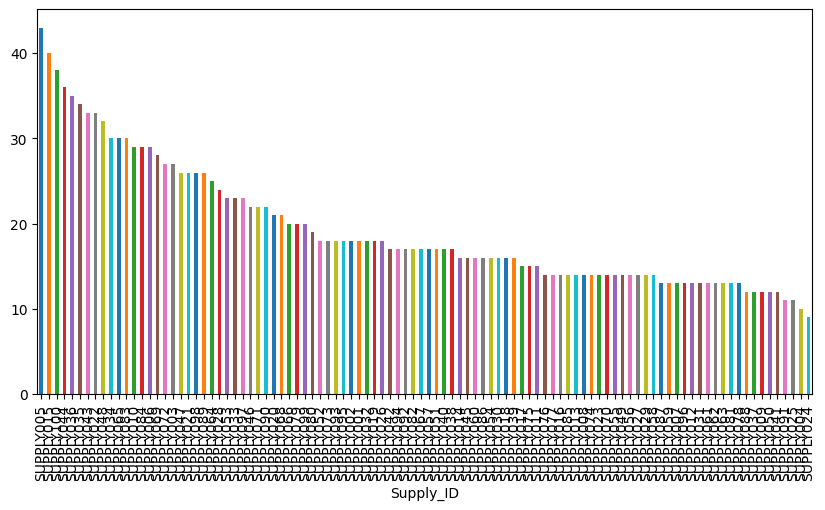

In [20]:
pandas_df["Supply_ID"].value_counts().plot(
    kind="bar", figsize=(10, 5), color=sns.color_palette()
)

## LAVORI

In [21]:
lavori_path = os.path.join(DATASET_PATH, "LAVORI.csv")

header, lines = read_csv_file(lavori_path)

pandas_df = pd.DataFrame(lines, columns=header)
pandas_df.head()

Reading CSV file: 855it [00:00, 246961.64it/s]


,Supply_ID,woa_activity_type,woa_activity_subtype,woe_dt_execution
0,SUPPLY001,RISG,BT,26/05/2020 08:32:38
1,SUPPLY001,RISG,BT,27/05/2020 09:28:38
2,SUPPLY001,RISG,BT,27/05/2020 14:34:27
3,SUPPLY001,RISG,BT,28/05/2020 15:55:00
4,SUPPLY001,RISG,BT,29/05/2020 18:06:18


<Axes: xlabel='Supply_ID'>

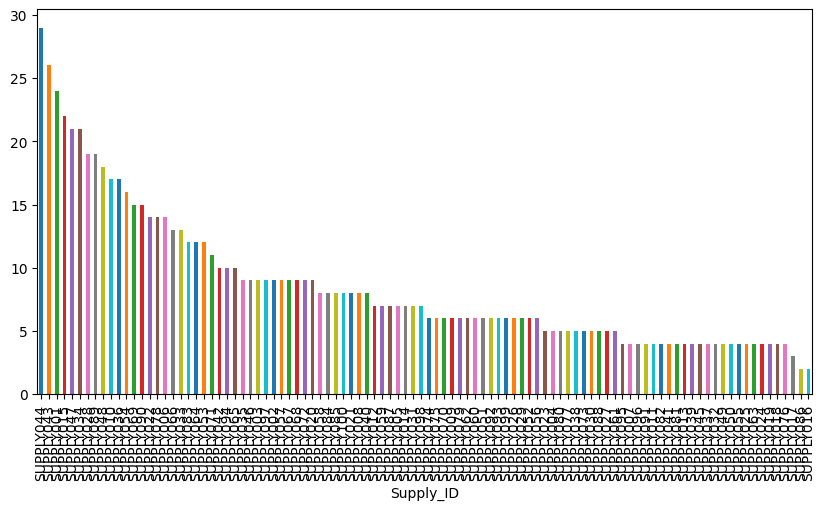

In [22]:
pandas_df["Supply_ID"].value_counts().plot(
    kind="bar", figsize=(10, 5), color=sns.color_palette()
)

## INTERRUZIONI

In [24]:
interruzioni_path = os.path.join(DATASET_PATH, "INTERRUZIONI.csv")

header, lines = read_csv_file(interruzioni_path)

pandas_df = pd.DataFrame(lines, columns=header)
pandas_df.head()

Reading CSV file: 363it [00:00, 334843.27it/s]


,Supply_ID,tipologia_interruzione,start_date,end_date,durata_netta
0,SUPPLY001,C,03/05/2018,03/05/2018,288
1,SUPPLY001,A,08/05/2018,08/05/2018,276
2,SUPPLY001,A,15/05/2018,15/05/2018,58
3,SUPPLY001,A,29/06/2018,29/06/2018,65
4,SUPPLY001,C,17/07/2018,17/07/2018,496


<Axes: xlabel='Supply_ID'>

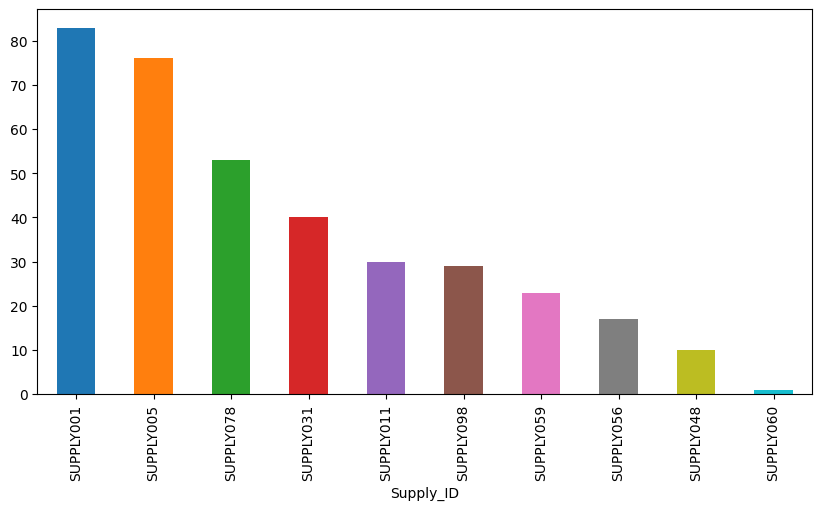

In [25]:
pandas_df["Supply_ID"].value_counts().plot(
    kind="bar", figsize=(10, 5), color=sns.color_palette()
)

## PAROLE DI STATO

In [27]:
parole_di_stato_path = os.path.join(DATASET_PATH, "PAROLE_DI_STATO.csv")

header, lines = read_csv_file(parole_di_stato_path)

pandas_df = pd.DataFrame(lines, columns=header)
pandas_df.head()

Reading CSV file: 66518it [00:00, 379502.17it/s]


,Supply_ID,meas_ts,ListaParole
0,SUPPLY001,31/12/2017 23:00:00,PUP
1,SUPPLY001,06/01/2018 23:00:00,PUP
2,SUPPLY001,31/01/2018 23:00:00,PUP
3,SUPPLY001,28/02/2018 23:00:00,PUP
4,SUPPLY001,03/03/2018 23:00:00,PUP


<Axes: xlabel='Supply_ID'>

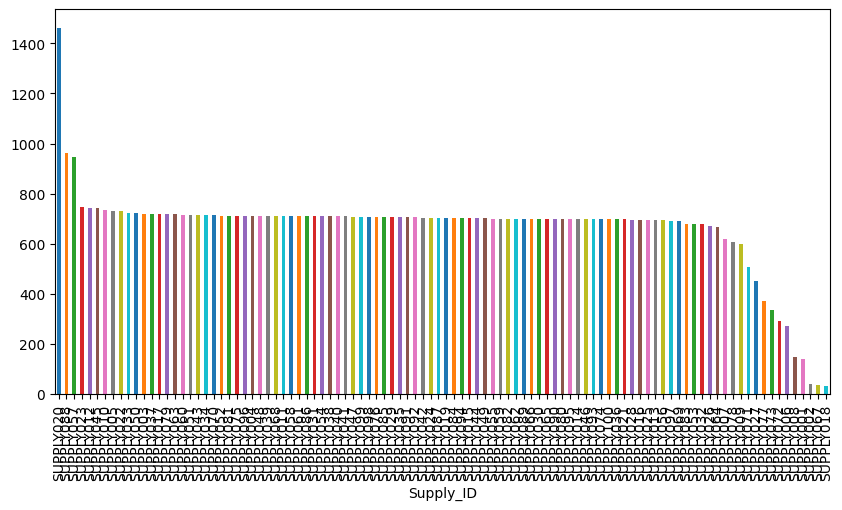

In [28]:
pandas_df["Supply_ID"].value_counts().plot(
    kind="bar", figsize=(10, 5), color=sns.color_palette()
)